# Part I - fordgobike-tripdata Dataset Exploration
## by Stephen Nyaga


In this notebook, I am doing Univariate, Bivariate, Multivariate explorations on the Ford GoBike data

## Introduction
### Table of Contents
#### Preliminary Wrangling
#### Univariate Exploration
#### Bivariate Exploration
#### Multivariate Exploration
#### Conclusion

  



## Preliminary Wrangling
 This data set includes information about individual rides made in a bike-sharing system


In [1]:
# import all packages and set plots to be embedded inline
from requests import get
from io import BytesIO
from zipfile import ZipFile
from os import listdir 
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Load the dataset as a Pandas DataFrame
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#statistical distribution of data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [30]:
# the first three data entries
df.head(3)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [6]:
#the last three data entries
df.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [4]:
#checking distributions of user_type
df.groupby('user_type').bike_id.count()

user_type
Customer       19868
Subscriber    163544
Name: bike_id, dtype: int64

In [8]:
#shows the dataset structure 
df.shape

(183412, 16)

### What is the structure of your dataset?

The fordgobike-tripdata dataset has 183412 rows and 16 columns. This indiactes that there is 183412 records with 17 features each.

### What is/are the main feature(s) of interest in your dataset?

The features of interest are user_type,duration_sec,member_gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The relationship btween the duration_sec and the other features.

## Univariate Exploration
looking in to  distribution of the main variable of interest: duration.


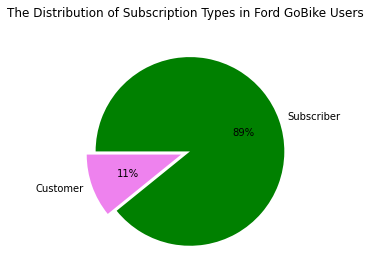

In [5]:

sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', colors = ['green','violet'],startangle=180, counterclock = False ,explode = (0, 0.1));
plt.title("The Distribution of Subscription Types in Ford GoBike Users", fontsize=12, y=1.07)
plt.axis('square');

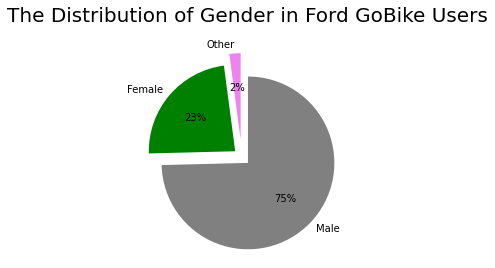

In [6]:
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%',colors = ['grey','green','violet'],explode = (0.1, 0.1,0.2), startangle=90, counterclock = False)
plt.title("The Distribution of Gender in Ford GoBike Users", fontsize=20, y=1.07)
plt.axis('square');

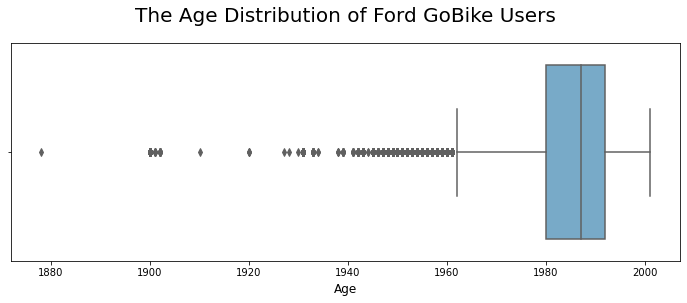

In [7]:
plt.figure(figsize=(12,4))
sb.boxplot(x='member_birth_year', data=df, palette='Blues')
plt.title("The Age Distribution of Ford GoBike Users", fontsize=20, y=1.07)
plt.xlabel("Age", fontsize=12, labelpad=5);

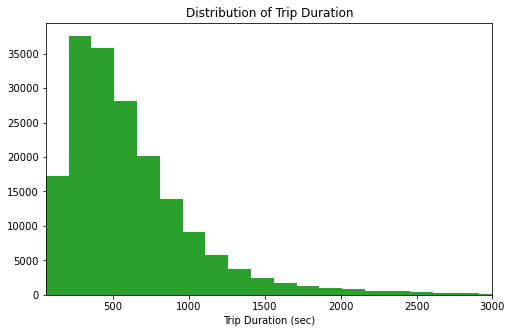

In [8]:

binsize = 150
bins = np.arange(60, df['duration_sec'].max()+binsize, binsize)
base_color = sb.color_palette()[2]
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins,color = base_color)
plt.xlim(61, 3000)
plt.xlabel('Trip Duration (sec)')
plt.title('Distribution of Trip Duration')
plt.show();

In [9]:
import math
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [10]:
df['distance_km'] = df.apply(lambda i: distance([i['start_station_longitude'],i['start_station_latitude']],
                            [i['end_station_longitude'],i['end_station_latitude']]), axis=1)

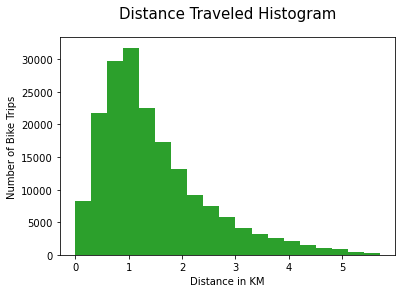

In [11]:
bin_edges = np.arange(0, 6, 0.3)
base_color = sb.color_palette()[2]
plt.hist(data = df, x = 'distance_km', bins = bin_edges,color = base_color)
plt.title("Distance Traveled Histogram", y = 1.06, fontsize = 15)
plt.xlabel('Distance in KM')
plt.ylabel('Number of Bike Trips');

In [12]:
# change trip duration variable from second to minute
df['duration_min'] = df['duration_sec'] / 60
df.drop('duration_sec' , axis = 1 , inplace = True)

The distribution is right-skewed, with a really long tail

It was very difficult to view the plot, I had to reduce the bin size to 150 and put a limit of 3000 on x-axis. I will change the trip duration variable to minute instead of second.

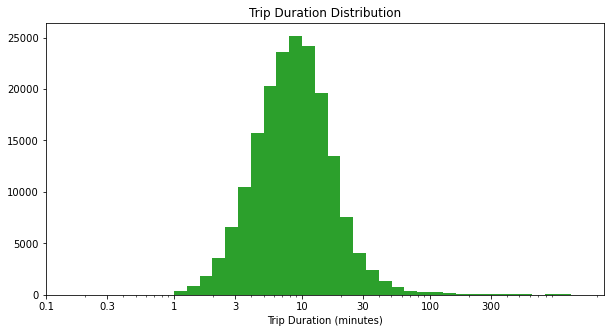

In [13]:
# trip duration distribution in log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
base_color = sb.color_palette()[2]
plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_min', bins = bins, color = base_color)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (minutes)')
plt.title('Trip Duration Distribution')
plt.show();

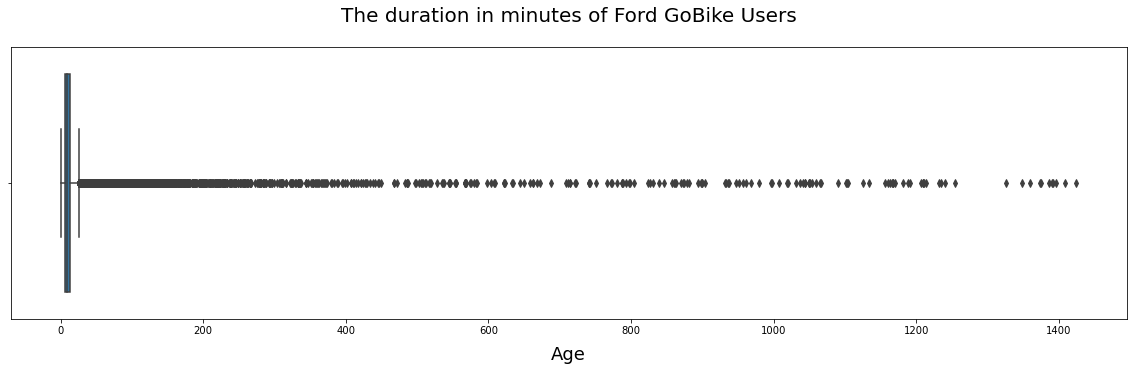

In [14]:
plt.figure(figsize=(20,5))
sb.boxplot(x='duration_min', data=df,)
plt.title("The duration in minutes of Ford GoBike Users", fontsize=20, y=1.07)
plt.xlabel("Age", fontsize=18, labelpad=10);



Then plot the distribution of trip duration again, but in minutes and with log scale on the x-axis

In [15]:
#Determine user distribution 
df.groupby('user_type').bike_id.count()

user_type
Customer       19868
Subscriber    163544
Name: bike_id, dtype: int64

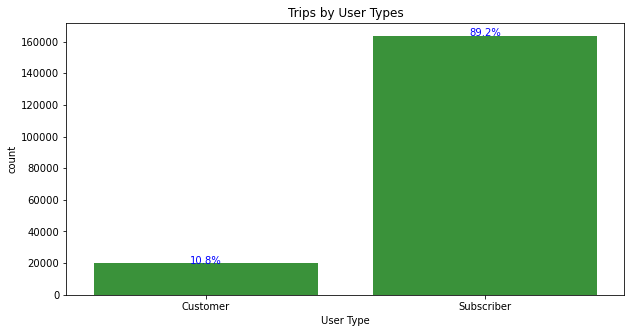

In [16]:
# plot distribution of user type
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[2]
sb.countplot(data = df, x = 'user_type', color = base_color)

n_points = df.shape[0]
user_counts = df['user_type'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b')

plt.title('Trips by User Types')
plt.xlabel('User Type')

plt.show()

The  users has two 89.2% of the users were Subscribers while the rest (10.8%) were Customers 



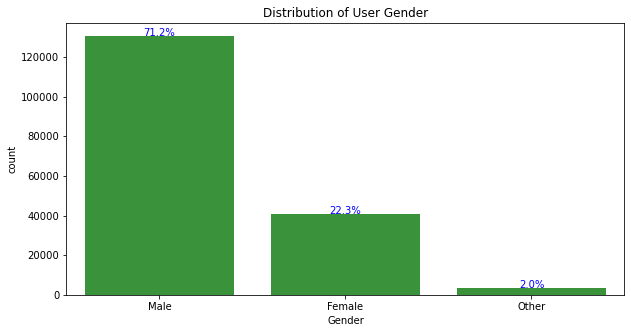

In [17]:
# plot distribution of gender
plt.figure(figsize=[10, 5])

base_color = sb.color_palette()[2]
gen_order = df['member_gender'].value_counts().index
sb.countplot(data = df, x = 'member_gender', color = base_color, order=gen_order)
plt.title('Distribution of User Gender')
plt.xlabel('Gender')

# print frequency on the bar chart
n_points = df.shape[0]
gender_counts = df['member_gender'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b')

plt.show()

Almost 71.2% of the users are male and 22.3% of the users are female. There is a 2.0% of the who gender is not indicated

In [18]:
# calculate age of each user
def calculate_age(born):
    today = date.today()
    return today.year - born

df['age'] = df.member_birth_year.map(calculate_age)

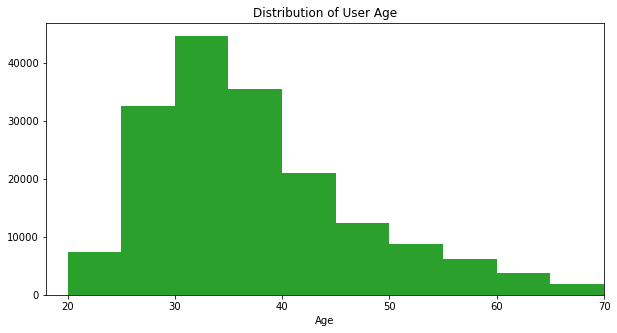

In [19]:
# plot distribution of age
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[2]
binsize = 5
bins = np.arange(0, df['age'].max()+binsize, binsize)

plt.hist(data = df, x = 'age', bins = bins,color = base_color )
plt.xlim(18, 70)
plt.xlabel('Age')
plt.title('Distribution of User Age')
plt.show()

The distribution is right-skewed with the peak at between 30 to 35 and as age gets higher, user count decreases.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with one peak around 10 minutes.

The other variables (user type, age, and gender) were as I expected with male subscriber age 30-35 to be highher than females in count.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I did change the duration variable from seconds to minutes because seconds are just too unreasonable to measure a trip duration. I also engineered new variables: season and age from existing variabes.

## Bivariate Exploration

I want to look at how trip duration is affected by Age.

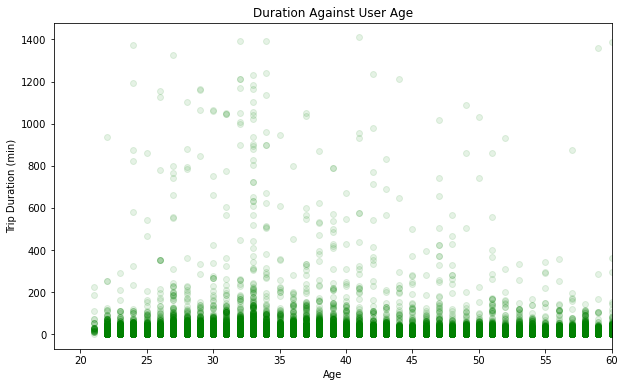

In [20]:
# scatter plot of duration vs. age
plt.figure(figsize = [10, 6])
plt.scatter(data = df, x = 'age', y = 'duration_min', alpha = 1/10, color = 'green')
plt.xlabel('Age')
plt.xlim(18, 60)
plt.ylabel('Trip Duration (min)')
plt.title('Duration Against User Age')
plt.show()

Users with age of 31 and 36 seem to have the highest trip duration and as the users get older, the trip duration becomes less.



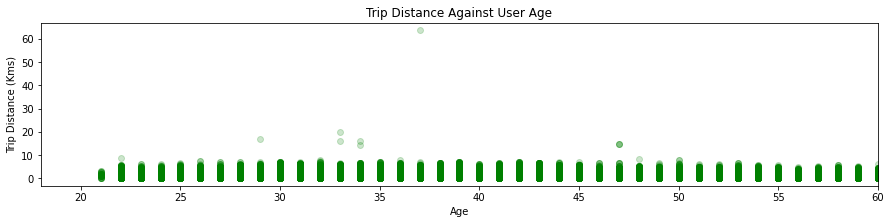

In [32]:
# scatter plot of distance travelled vs. age
plt.figure(figsize = [15, 3])
plt.scatter(data = df, x = 'age', y = 'distance_km', alpha = 1/5, color = 'green')
plt.xlabel('Age')
plt.xlim(18, 60)
plt.ylabel('Trip Distance (Kms)')
plt.title('Trip Distance Against User Age')
plt.show()

In [ ]:
Users with age of 31 and 36 seem to have the highest trip distance and as the users get older, the trip distance becomes less.


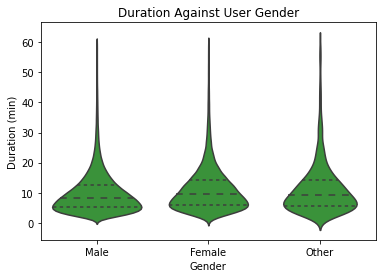

In [49]:
# query the data for duration only below 1 hour to focus the data
df_dur = df.query("duration_min < 60")

# plot relationship between gender and duration
base_color = sb.color_palette()[2]
sb.violinplot(data=df_dur, x='member_gender', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Duration Against User Gender');

The previous section it was shown that 70% of the users were male, but the trip duration does not seem to be affected by the user gender. The violin plots look similar for these 3 gender categories, with the median all similar (around 10 minutes).

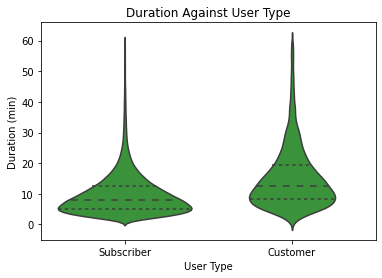

In [50]:
# plot relationship between user type and duration
base_color = sb.color_palette()[2]
sb.violinplot(data=df_dur, x='user_type', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('Duration Against User Type');

Subscriber users tend to ride the bikes in lesser duration than customer users. This might be because the subscriber users ride the bikes for regular commutes (work, school, etc.), but the customer users might be tourists that use the bikes for traveling around town.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
There was also an interesting relationship observed between duration and the categorical features. For genders, the trip duration does not seem to differ between Female, Male, and Other. For user type, Customer type has more trip duration than Subscriber type, and this is caused by the regularities in Subscriber trips, while Customer trips might be more random.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is not interesting relationship between other feature. 

## Multivariate Exploration
I want to investigate on the relationship between the trip duration and the age and gender of the users.
Age from 18 to 56 takes 95% of the users. So, it's logical to remove users more than 60 years old. There were users more than 100 years old. I searched at Ford sign in webpage and realized they allow users to put some unusual birth year, such as 1918.

In [51]:
# remove users more than 60 years old
df_age = df_dur[df_dur['age']<=60]

In [52]:


# generate a new field for member age group
df_age['member_age_bins'] = df_age['age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

C:\Users\Kay\AppData\Local\Temp\ipykernel_4728\1604563381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['member_age_bins'] = df_age['age'].apply(lambda x: '10 - 20' if 10<x<=20


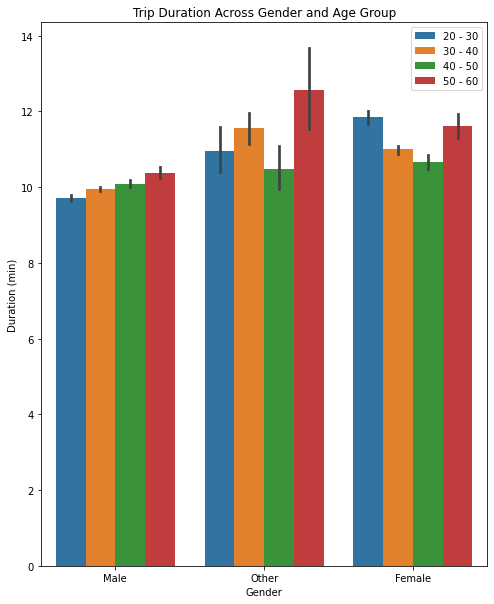

In [74]:
# create bar plot on gender versus duration on levels of the age bins variable
plt.figure(figsize = [8, 10])

ax = sb.barplot(x='member_gender', y = 'duration_min', hue='member_age_bins', data=df_age.sort_values(by= 'member_age_bins'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
leg = ax.legend()

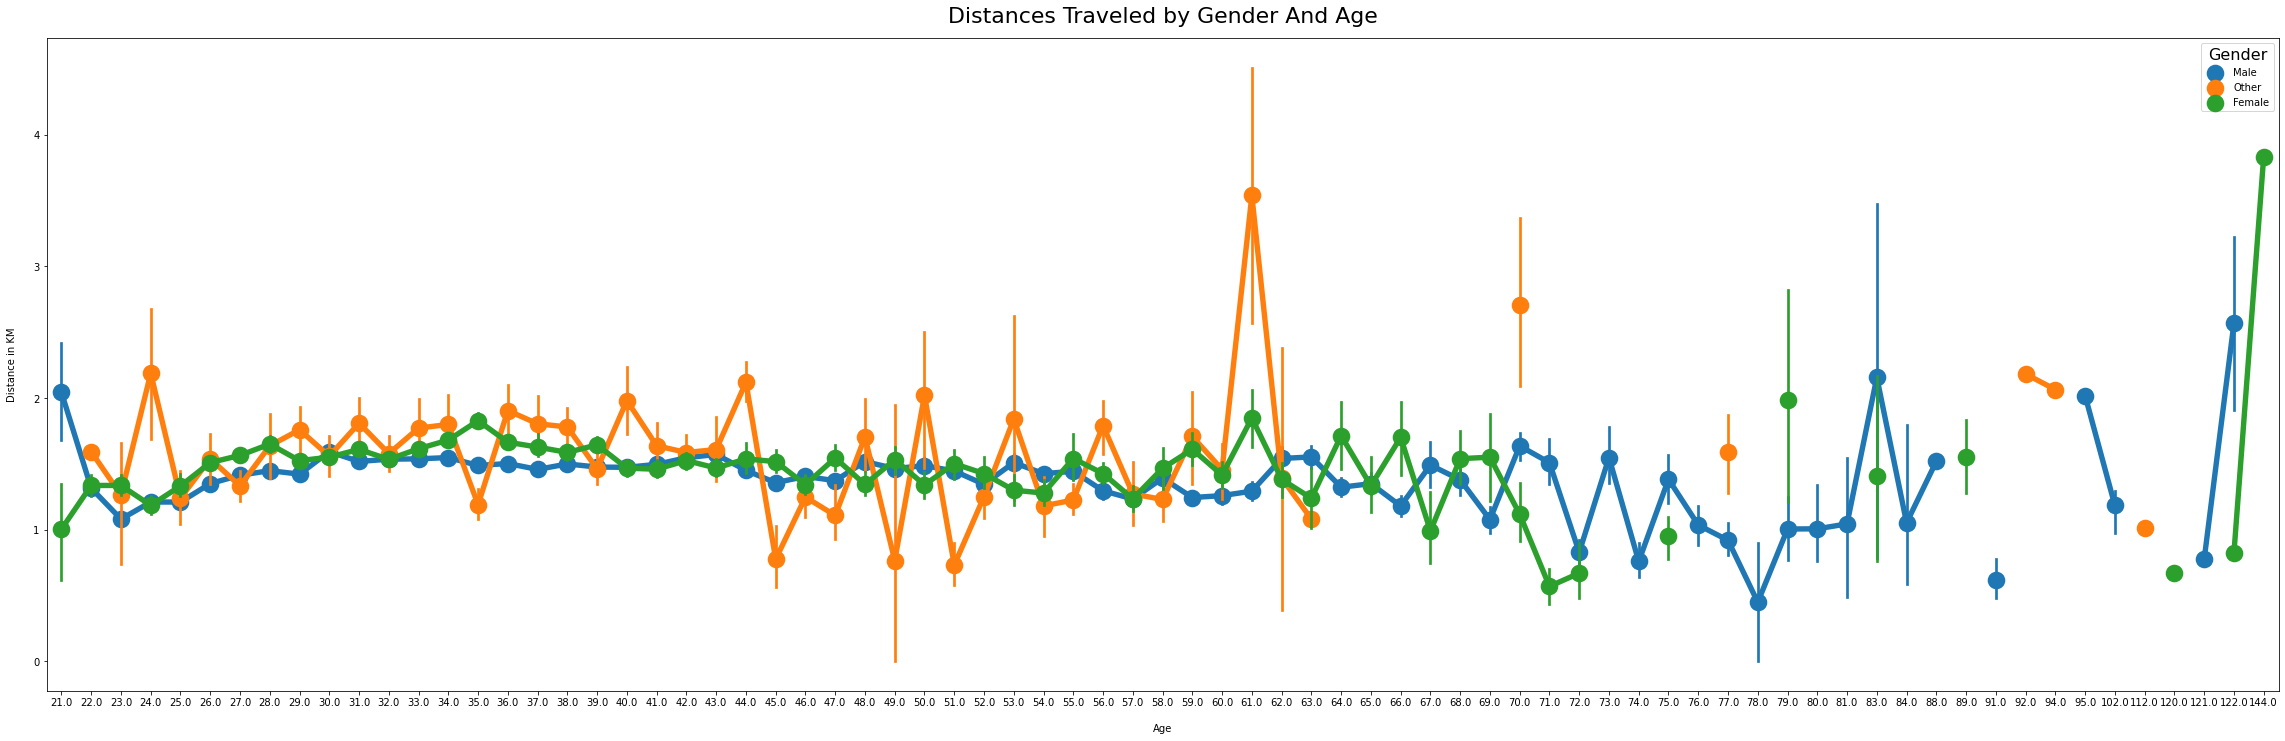

In [36]:
plt.figure(figsize=(40,12))
ax = sb.pointplot(x='age', y='distance_km', hue='member_gender', scale=2, data=df)
plt.title('Distances Traveled by Gender And Age', fontsize=22, y=1.015)
plt.xlabel('Age', labelpad=16)
plt.ylabel('Distance in KM', labelpad=16)
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
In male and other_gender the age range of 50-60 has the longest trip duration except for females, this is maybe due to the amount of free time from work since they are mostly retired,so they tend to ride the bikes longer either for recreation and also for health recommendations.

### Were there any interesting or surprising interactions between features?

My biggest surprise was that the second longest trip duration in female and male actually belongs to the 50-60 age group. I would have thought that Users with age 20-30 would have the longest duration and also males youngsters should have high durations than females which is not the case presented by the data set. My assumption is maybe the Age Group of 50-60 would ride in slower speed than 20-30 year olds and would need longer duration to reach their destinations.

## Conclusions
The data set contains data that is well distributed across age, gender, distance covered and duration of time taken to cover.
The elderly seems to cover larger distances than young ones.
